In [ ]:
import pandas as pd
import gseapy as gp

In [10]:


# Step 1: Load the CSV File
de_genes = pd.read_csv("epi2_normal_vs_endometriosis.csv")

# Step 2: Filter Genes by Threshold
logFC_threshold = 1.5
pval_threshold = 0.05

# Filter for genes with high log fold changes and significant p-values
filtered_genes = de_genes[
    (de_genes["logfoldchanges"].abs() > logFC_threshold) & (de_genes["pvals_adj"] < pval_threshold)
]

# Extract gene names as a list
gene_list = filtered_genes["names"].tolist()
print(f"Filtered genes: {gene_list}")

# Step 3: Perform Enrichment Analysis
# Specify gene sets and databases
enr_bg = gp.enrichr(
    gene_list=gene_list,
    gene_sets=["MSigDB_Hallmark_2020", "KEGG_2021_Human", "GO_Molecular_Function_2023", "Reactome_Pathways_2024", "WikiPathways_2024_Human"],
    outdir=None,  # No output files written to disk
)



Filtered genes: ['AC023424.3', 'ANKUB1', 'AL354733.3', 'ZBTB20-AS5', 'AC002463.1', 'AC006059.1', 'TMLHE-AS1', 'AC093535.1', 'AP001021.3', 'AL157938.2', 'AC053513.1', 'AC023509.6', 'BCL2L14', 'CNTN5', 'AC090579.1', 'AC211433.1', 'AC120193.1', 'AP000787.1', 'MAGI1-AS1', 'USP3-AS1', 'AC107068.2', 'ANGPT2', 'HIF1A-AS3', 'AC007098.1', 'IL7', 'AP003086.1', 'AC002429.2', 'ALG13-AS1', 'AC068282.1', 'AC007384.1', 'IGFBP1', 'TIMP3', 'AC131571.1', 'AC023590.1', 'AC027018.1', 'AL035427.1', 'AL157786.1', 'SLC16A4', 'AC087286.2', 'AC117834.1', 'AC017101.1', 'AC079465.1', 'AL031428.1', 'AC074033.1', 'LINC02523', 'RPA3', 'KIZ-AS1', 'AC104365.1', 'AC008937.2', 'AC110767.1', 'AC009554.1', 'ZNF451-AS1', 'LINC01090', 'ERI2', 'MYCBP2-AS1', 'AL359706.1', 'DIAPH2-AS1', 'TSPOAP1-AS1', 'LINC02672', 'AL078459.1', 'CASC19', 'TTN', 'ZMYM4-AS1', 'AF127577.2', 'AC025917.1', 'AL024474.2', 'MTCP1', 'AL450992.2', 'AC055733.2', 'OMG', 'AP000462.1', 'KCNMB2-AS1', 'AC073349.4', 'AC004594.1', 'AC010976.1', 'CASC8', 'G2E3-

In [11]:
enr_bg.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Pancreas Beta Cells,2/40,0.638728,0.999981,0,0,0.931007,4.173487e-01,PCSK1;SST
1,MSigDB_Hallmark_2020,Coagulation,6/138,0.753883,0.999981,0,0,0.803059,2.268785e-01,CFD;MMP11;CPB2;TIMP3;MASP2;LEFTY2
2,MSigDB_Hallmark_2020,Spermatogenesis,4/135,0.934942,0.999981,0,0,0.538476,3.622360e-02,CRISP2;GAPDHS;ACRV1;ART3
3,MSigDB_Hallmark_2020,TGF-beta Signaling,1/54,0.948859,0.999981,0,0,0.333180,1.749028e-02,LEFTY2
4,MSigDB_Hallmark_2020,Inflammatory Response,6/200,0.959889,0.999981,0,0,0.544609,2.229488e-02,IL1A;GPR132;PTGIR;CXCL8;OPRK1;TACR1
...,...,...,...,...,...,...,...,...,...,...
1488,WikiPathways_2024_Human,Circadian Rhythm Genes WP3594,1/201,0.999982,0.999996,0,0,0.087605,1.607735e-06,TH
1489,WikiPathways_2024_Human,Pleural Mesothelioma WP5087,7/437,0.999983,0.999996,0,0,0.283314,4.792543e-06,ANGPT2;TERT;HGF;CDH10;NTF3;KDR;IGF2
1490,WikiPathways_2024_Human,Ciliary Landscape WP4352,1/215,0.999990,0.999996,0,0,0.081813,8.457996e-07,NEFM
1491,WikiPathways_2024_Human,Cancer Pathways WP5434,6/507,0.999995,0.999996,0,0,0.207431,9.791348e-07,CDKN2B;CXCL8;TERT;IL7;HGF;IGF2


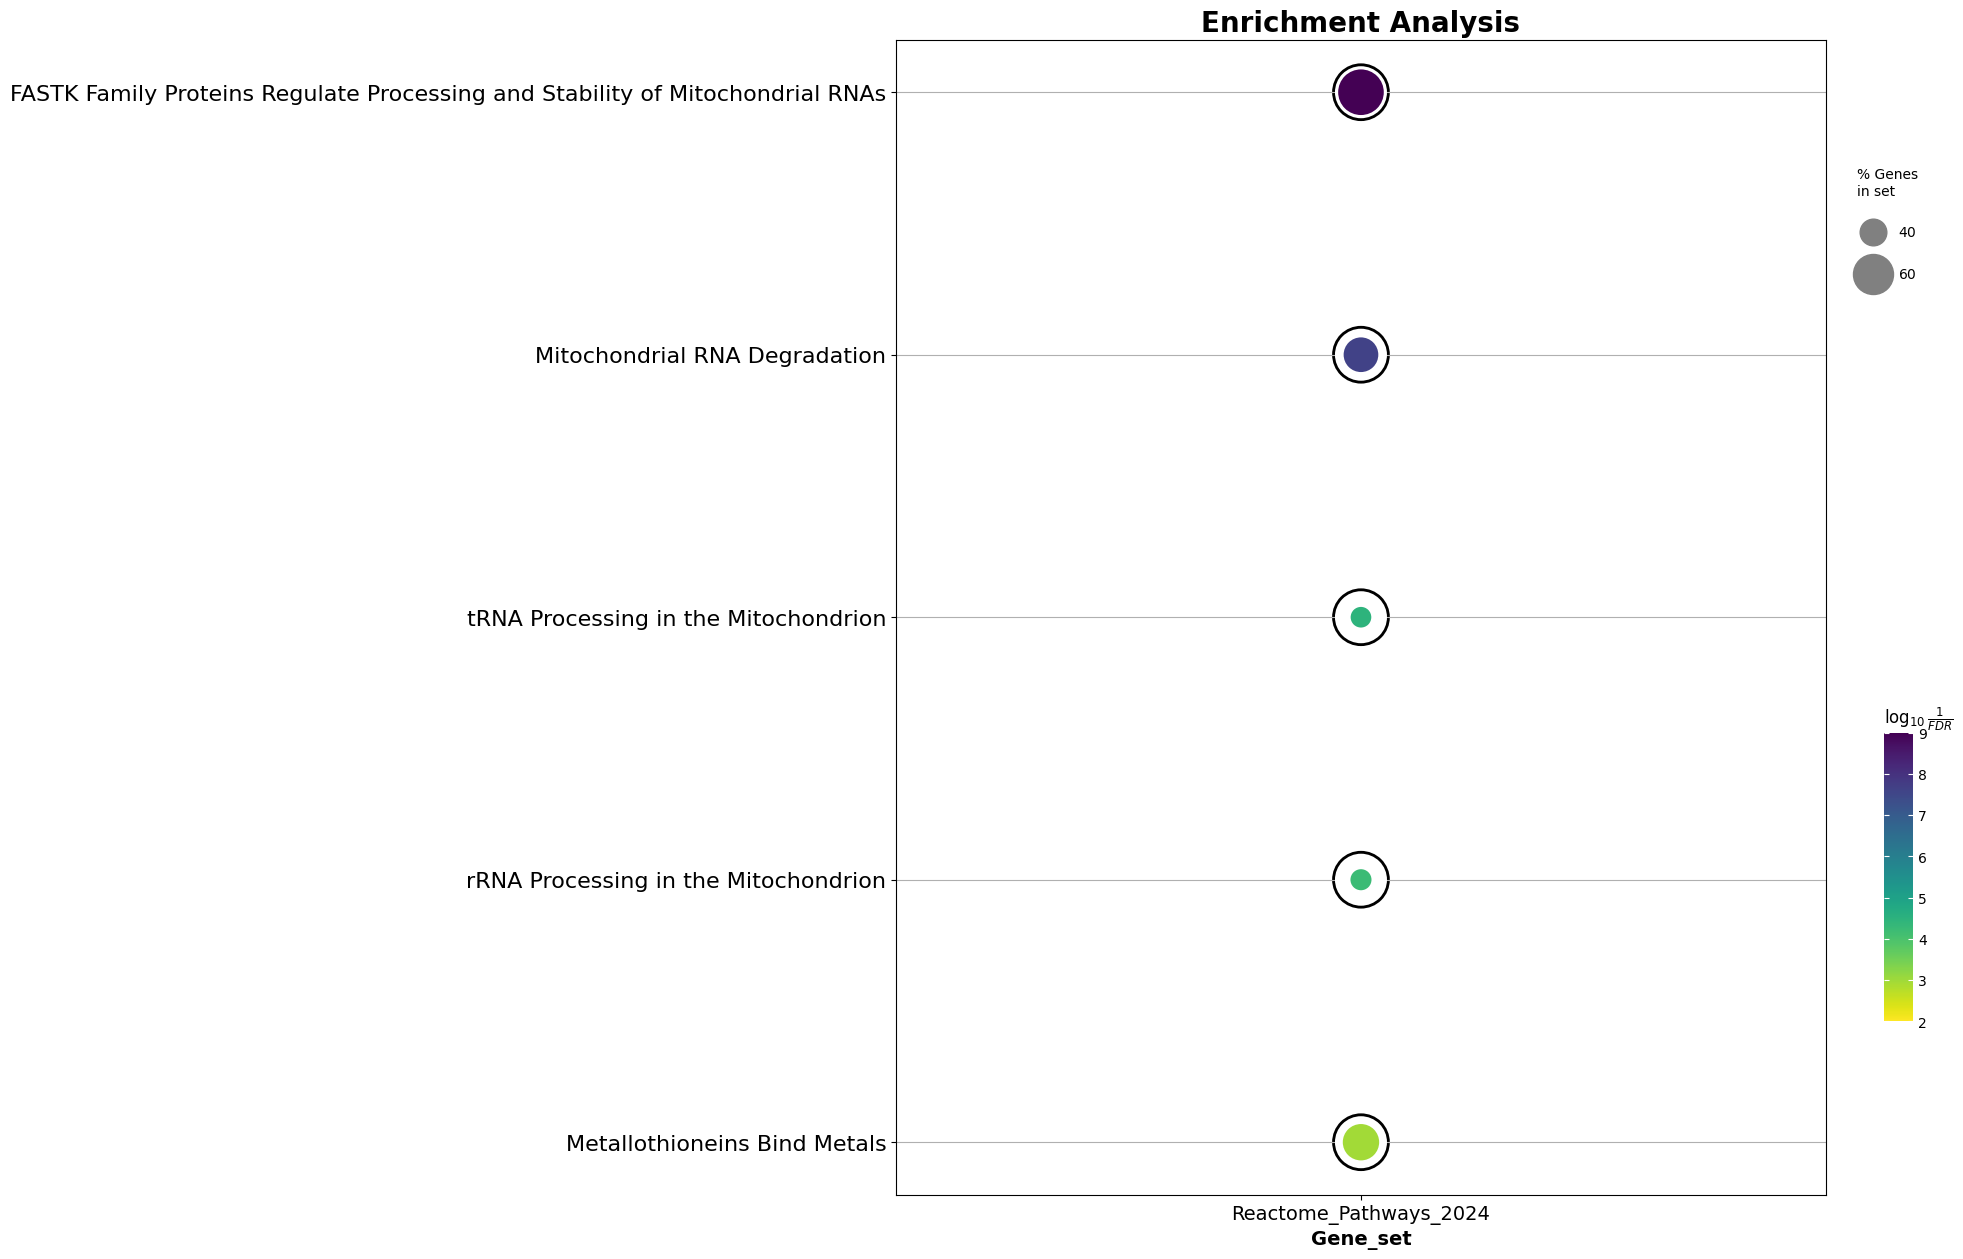

In [22]:
ax = gp.dotplot(enr_bg.results,
              column="Adjusted P-value",
              x="Gene_set",
              size=8,
              top_term=5,
              figsize=(15,15),
              title = "Enrichment Analysis", 
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

In [3]:
for db_name, df in enr_bg.res2d.items():
    if isinstance(df, pd.DataFrame):  # Ensure it's a DataFrame
        # Sort the results to find the top enriched pathways
        df = df.sort_values(by="Adjusted P-value").head(10)
        
        # Create a dotplot for the top pathways
        ax = dotplot(
            df,
            column="Adjusted P-value",
            x="Gene_set",  # Pathways
            size=10,  # Dot size
            top_term=5,  # Display the top 5 pathways
            figsize=(6, 5),
            title=f"Top Pathways for {db_name}",
            xticklabels_rot=45,  # Rotate x-axis labels
            show_ring=True,  # Include a ring for effect size
            marker="o",
        )